In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap, ListedColormap
import seaborn as sns

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_samples=200, n_features=2,
    n_informative=2, n_redundant=0,
    random_state=42
)


data = pd.DataFrame(np.hstack((X, y.reshape(-1, 1))),
                    columns=['x1', 'x2', 'y'])

__Задание 1.__

Обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделяющую поверхность на трейне (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились? (2б)

In [3]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

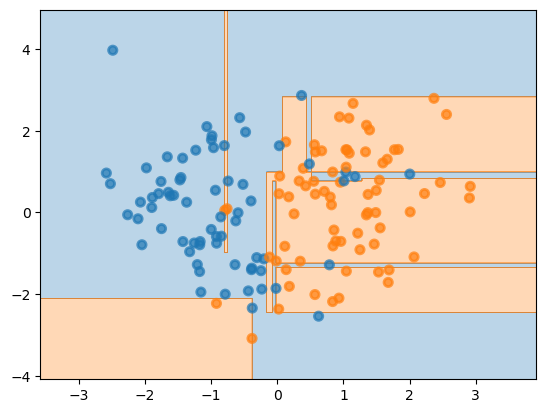

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

### Your code is here
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
plot_surface(tree, X_train, y_train)

In [6]:
print("Accuracy on train:", accuracy_score(y_train, tree.predict(X_train)))
print("Accuracy on test:", accuracy_score(y_test, tree.predict(X_test)).round(3))

Accuracy on train: 1.0
Accuracy on test: 0.8


__Задание 2.__

Переберите несколько параметров для регуляризации (`max_depth`, `min_samples_leaf`) из предложенных. Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Используйте, если хотите, функцию ниже. Как изменение параметров влияет на поверхность? При каких параметрах на тесте достигается лучшее качество? А на трейне? (2б).

In [7]:
def plot_surface_axes(clf, X, y, ax, train_acc, test_acc):
    y_int = y.values.astype(int)
    
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X.values[:, 0].min() - 1, X.values[:, 0].max() + 1
    y_min, y_max = X.values[:, 1].min() - 1, X.values[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)
    ax.scatter(X.values[:, 0], X.values[:, 1], c=y_int, cmap=cmap, alpha=.7,edgecolors=np.array(palette)[y_int],
    linewidths=2)
    
    
    ax.plot([], [], label = 'train_acc : %0.5f' % train_acc)
    ax.plot([], [], label = 'test_acc : %0.5f' % test_acc)
    
    plt.legend(loc = 'lower right', prop={'size': 20})

In [8]:
max_depth_set = [6, 7, 8, 9, 12]

min_samples_leaf_set = [3, 5, 7, 10]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state = 42) 

In [10]:
### Your code is here
accuracy_train = {}
accuracy_test = {}
for depth in max_depth_set:
    for sample_leaf in min_samples_leaf_set:
        tree = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=sample_leaf)
        tree.fit(X_train, y_train)
        accuracy_train[(depth, sample_leaf)] = accuracy_score(y_train, tree.predict(X_train)).round(3)
        accuracy_test[(depth, sample_leaf)] = accuracy_score(y_test, tree.predict(X_test)).round(3)
print("Accuracy on train:", accuracy_train)
print("Accuracy on test:", accuracy_test)

Accuracy on train: {(6, 3): 0.944, (6, 5): 0.925, (6, 7): 0.912, (6, 10): 0.9, (7, 3): 0.944, (7, 5): 0.925, (7, 7): 0.912, (7, 10): 0.9, (8, 3): 0.944, (8, 5): 0.925, (8, 7): 0.912, (8, 10): 0.9, (9, 3): 0.944, (9, 5): 0.925, (9, 7): 0.912, (9, 10): 0.9, (12, 3): 0.944, (12, 5): 0.925, (12, 7): 0.912, (12, 10): 0.9}
Accuracy on test: {(6, 3): 0.8, (6, 5): 0.8, (6, 7): 0.8, (6, 10): 0.8, (7, 3): 0.8, (7, 5): 0.8, (7, 7): 0.8, (7, 10): 0.8, (8, 3): 0.8, (8, 5): 0.8, (8, 7): 0.8, (8, 10): 0.8, (9, 3): 0.8, (9, 5): 0.8, (9, 7): 0.8, (9, 10): 0.8, (12, 3): 0.8, (12, 5): 0.8, (12, 7): 0.8, (12, 10): 0.8}


__Задание 3.__

Добавим признак $2\cdot x_1 - x_2$, транформацию добавим как шаг пайплайна. С помощью данного класса (из практики/лекции) обучите дерево с максимальной глубиной=3, нарисуйте поверхность на трейне, посчитайте accuracy (2 б)

In [11]:
from sklearn.base import BaseEstimator, TransformerMixin

class CustomFunctionTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, first_col, second_col, function):
        self.first_col = first_col
        self.second_col = second_col
        self.function = function
        print("Инициализировали класс!")
        
    def fit(self, X, y=None):
        print("Зафитили датасет!")
        return self
    
    def transform(self, X, y=None):
        
        X_ = X.copy()
        X_['new_feature'] = self.function(X_[self.first_col], X_[self.second_col])
        X_ = X_.drop([self.first_col, self.second_col], axis=1)
        
        print("Трансформировали датасет!")
        return X_

In [12]:
X_train = pd.DataFrame(X_train, columns=['x1', 'x2'])
X_test = pd.DataFrame(X_test, columns=['x1', 'x2'])

In [13]:
from sklearn.pipeline import Pipeline

### Your code is here
pipe = Pipeline([('custom', CustomFunctionTransformer('x1', 'x2', lambda x, y: 2 * x - y)),
                 ('tree', DecisionTreeClassifier(max_depth=3))])
pipe.fit(X_train, y_train)
print("Accuracy on train:", accuracy_score(y_train, pipe.predict(X_train)).round(3))
print("Accuracy on test:", accuracy_score(y_test, pipe.predict(X_test)).round(3))

Инициализировали класс!
Зафитили датасет!
Трансформировали датасет!
Трансформировали датасет!
Accuracy on train: 0.862
Трансформировали датасет!
Accuracy on test: 0.75
